In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import mlflow
import mlflow.sklearn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn.cluster import AgglomerativeClustering

In [20]:
X_pca=pd.read_excel(r"PCA_data.xlsx")
df=pd.read_excel(r'imp_features.xlsx')

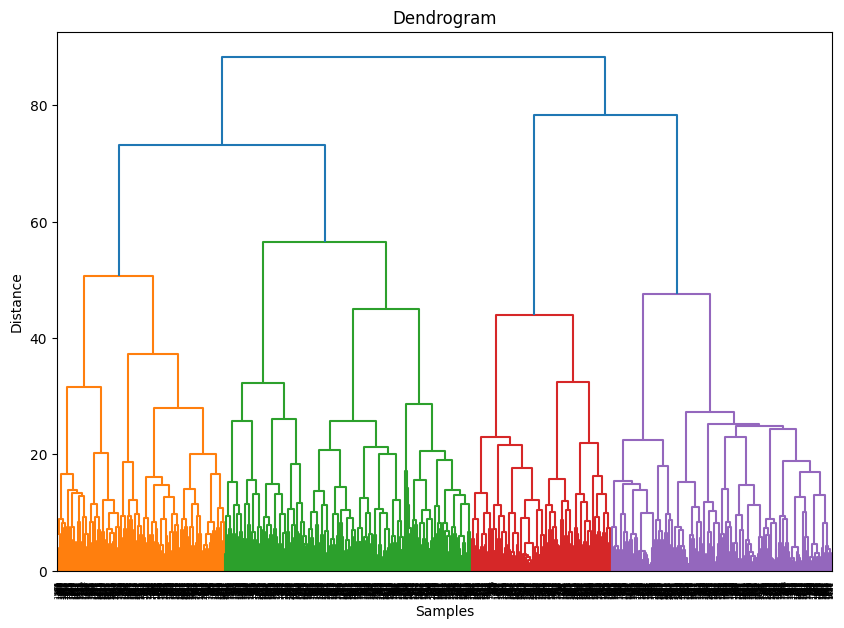

In [21]:
# Perform hierarchical/agglomerative clustering using Ward's method
Z = linkage(X_pca, method='ward')

# Create a dendrogram to visualize the hierarchical structure
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

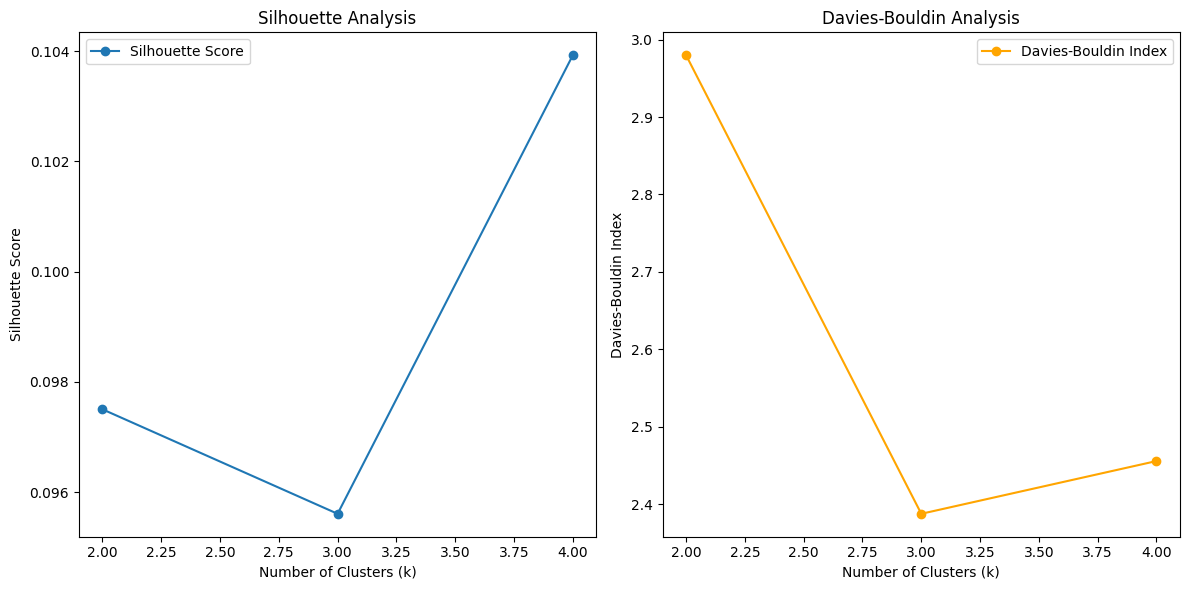

Optimal k (Silhouette Score): 4
Silhouet Score for 2 to 15 K value [0.09750334836104148, 0.09560764399512332, 0.10392558754289921]
Davies-Bouldin Index for 2 to 15 K value [2.979778333469091, 2.387410865545002, 2.4555511523801132]
Optimal k (Davies-Bouldin Index): 3


In [22]:
# Define the range of clusters to evaluate
k_range = range(2, 5)  # Silhouette/Davies-Bouldin requires at least 2 clusters

# Initialize lists to store metrics
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores=[]
# Perform clustering and calculate validation metrics
for k in k_range:
    
    cluster_labels = fcluster(Z, k, criterion='maxclust')
    
    # Silhouette Score
    sil_score = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(sil_score)
    ch_score = calinski_harabasz_score(X_pca, cluster_labels)
    calinski_harabasz_scores.append(ch_score)
    # Davies-Bouldin Index (lower is better)
    db_score = davies_bouldin_score(X_pca, cluster_labels)
    davies_bouldin_scores.append(db_score)

# Plot Silhouette Scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()

# Plot Davies-Bouldin Index
plt.subplot(1, 2, 2)
plt.plot(k_range, davies_bouldin_scores, marker='o', color='orange', label='Davies-Bouldin Index')
plt.title('Davies-Bouldin Analysis')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.legend()

plt.tight_layout()
plt.show()

# Output optimal clusters
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
optimal_k_davies_bouldin = k_range[np.argmin(davies_bouldin_scores)]
optimal_k_calinski = k_range[np.argmin(calinski_harabasz_scores)]
print(f"Optimal k (Silhouette Score): {optimal_k_silhouette}")
print (f"Silhouet Score for 2 to 15 K value {silhouette_scores}")
print (f"Davies-Bouldin Index for 2 to 15 K value {davies_bouldin_scores}")
print(f"Optimal k (Davies-Bouldin Index): {optimal_k_davies_bouldin}")

In [23]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=2,compute_full_tree="auto",).fit(X_pca) 


In [24]:
def silhouette_metric(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)
def davies_bouldin_metric(estimator, X):
    labels = estimator.fit_predict(X)
    return davies_bouldin_score(X, labels)
def calinski_harabasz_metric(estimator, X):
    labels = estimator.fit_predict(X)
    return calinski_harabasz_score(X, labels)

In [25]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_clusters': [2, 3, 4, 5],  # Adjust the range as needed
    'linkage': ['ward', 'complete', 'average'],
    
}

# Create an instance of the AgglomerativeClustering model
model = AgglomerativeClustering()

# Create a GridSearchCV object
Silhot_grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=silhouette_metric, cv=5)
davies_grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=davies_bouldin_metric, cv=5)
calinski_grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=calinski_harabasz_metric, cv=5)

# Fit the GridSearchCV object to your data
Silhot_grid_search.fit(X_pca)
davies_grid_search.fit(X_pca)
calinski_grid_search.fit(X_pca)
# Print the best hyperparameters found by GridSearchCV
print("Best parameters:", Silhot_grid_search.best_params_)
print("Best parameters:", davies_grid_search.best_params_)
print("Best parameters:", calinski_grid_search.best_params_)

Best parameters: {'linkage': 'average', 'n_clusters': 2}
Best parameters: {'linkage': 'ward', 'n_clusters': 3}
Best parameters: {'linkage': 'ward', 'n_clusters': 2}


In [26]:
# Get the best model
Silhot_best_model = Silhot_grid_search.best_estimator_
davies_best_model = davies_grid_search.best_estimator_
calinski_best_model = calinski_grid_search.best_estimator_
# Fit the best model to your data
Silhot_best_model.fit(X_pca)
davies_best_model.fit(X_pca)
calinski_best_model.fit(X_pca)
# Get cluster labels
Silhot_labels = Silhot_best_model.labels_
davies_labels = davies_best_model.labels_
calinski_labels = calinski_best_model.labels_

# **best Silhouette Score**

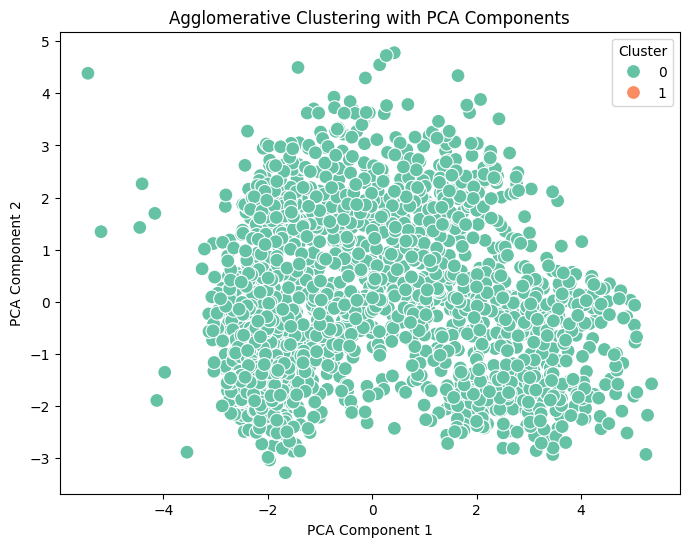

In [27]:
# Visualize the Agglomerative Clustering in the PCA space
plt.figure(figsize=(8, 6))

# Scatter plot: Points labeled by their cluster assignment
sns.scatterplot(x=X_pca[0], y=X_pca[1], hue=Silhot_labels, palette='Set2', s=100)

plt.title('Agglomerative Clustering with PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.show()

In [28]:
results=[]
results.append((len(set(Silhot_labels)),silhouette_score(X_pca,Silhot_labels), davies_bouldin_score(X_pca,Silhot_labels), calinski_harabasz_score(X_pca,Silhot_labels)))
best_sil= pd.DataFrame(results, columns=[ 'Num_Clusters', 'Silhouette_Score', 'DBI', 'CH'])

In [29]:
best_sil

,Num_Clusters,Silhouette_Score,DBI,CH
0,2,0.506846,0.373773,6.922085


# **calinski_harabasz_index**

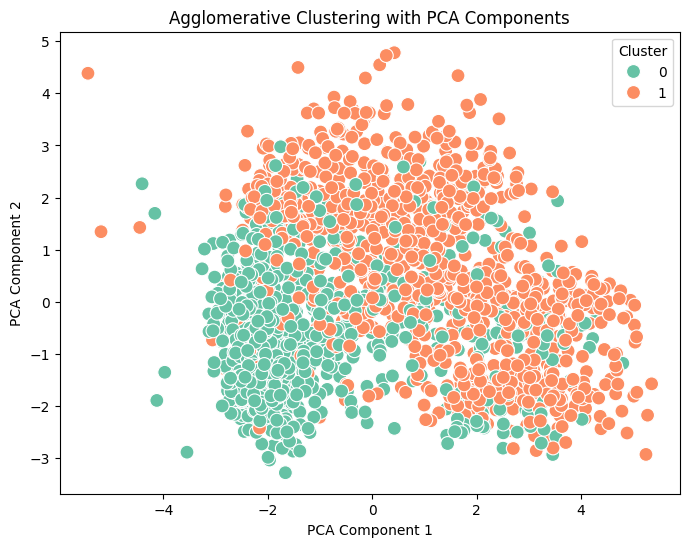

In [30]:
# Visualize the Agglomerative Clustering in the PCA space
plt.figure(figsize=(8, 6))

# Scatter plot: Points labeled by their cluster assignment
sns.scatterplot(x=X_pca[0], y=X_pca[1], hue=calinski_labels, palette='Set2', s=100)

plt.title('Agglomerative Clustering with PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.show()

In [31]:
results1=[]

results1.append((len(set(calinski_labels)),silhouette_score(X_pca,calinski_labels), davies_bouldin_score(X_pca,calinski_labels), calinski_harabasz_score(X_pca,calinski_labels)))
best_ch= pd.DataFrame(results1, columns=[ 'Num_Clusters', 'Silhouette_Score', 'DBI', 'CH'])

In [32]:
best_ch

,Num_Clusters,Silhouette_Score,DBI,CH
0,2,0.097503,2.979778,213.690545


# **davies bouldin index**

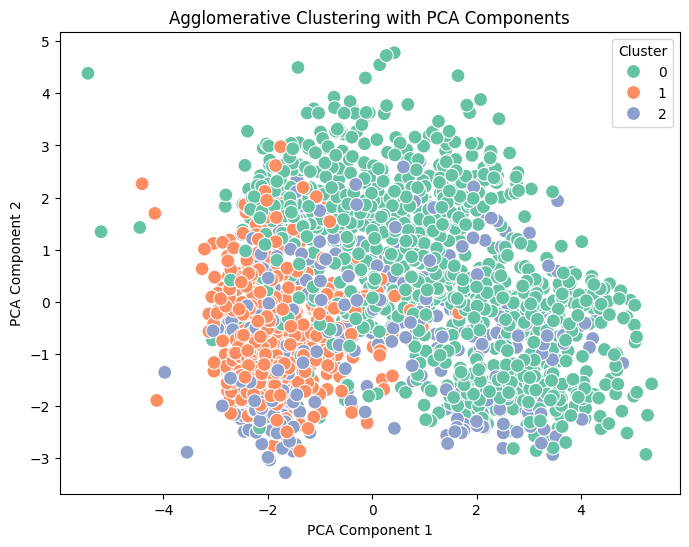

In [33]:
# Visualize the Agglomerative Clustering in the PCA space
plt.figure(figsize=(8, 6))

# Scatter plot: Points labeled by their cluster assignment
sns.scatterplot(x=X_pca[0], y=X_pca[1], hue=davies_labels, palette='Set2', s=100)

plt.title('Agglomerative Clustering with PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.show()

In [34]:
results2=[]

results2.append((len(set(davies_labels)),silhouette_score(X_pca,davies_labels), davies_bouldin_score(X_pca,davies_labels), calinski_harabasz_score(X_pca,davies_labels)))
best_dbi= pd.DataFrame(results2, columns=[ 'Num_Clusters', 'Silhouette_Score', 'DBI', 'CH'])

In [35]:
best_dbi

,Num_Clusters,Silhouette_Score,DBI,CH
0,3,0.095608,2.387411,208.450512


****

# **Mlflow**

In [36]:


# Log results to MLflow
mlflow.set_experiment("Agglomerative Clustering Tuning")

# Log best Silhouette Score model
with mlflow.start_run(run_name="Best_Silhouette_Agglomerative"):
    mlflow.log_params({'n_clusters': best_sil['Num_Clusters']})
    mlflow.log_metrics({
        'Silhouette_Score': best_sil['Silhouette_Score'],
        'davies_bouldin_index': best_sil['DBI'],
        'calinski_harabasz_index': best_sil['CH']
    })

# Log best Davies-Bouldin Index model
with mlflow.start_run(run_name="Best_DBI_Agglomerative"):
    mlflow.log_params({'n_clusters': best_dbi['Num_Clusters']})
    mlflow.log_metrics({
        'Silhouette_Score': best_dbi['Silhouette_Score'],
        'davies_bouldin_index': best_dbi['DBI'],
        'calinski_harabasz_index': best_dbi['CH']
    })

# Log best Calinski-Harabasz Index model
with mlflow.start_run(run_name="Best_CH_Agglomerative"):
    mlflow.log_params({'n_clusters': best_ch['Num_Clusters']})
    mlflow.log_metrics({
        'Silhouette_Score': best_ch['Silhouette_Score'],
        'davies_bouldin_index': best_ch['DBI'],
        'calinski_harabasz_index': best_ch['CH']
    })
